In [1]:
operator = "+"

In [2]:
! git clone -b master https://github.com/Tikquuss/STI
%cd STI

Cloning into 'STI'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
/content/STI


```stable_baselines``` ne supporte pas ```tf>2.x```

In [3]:
try:
    %tensorflow_version 1.x
    %matplotlib inline
except Exception:
    pass

TensorFlow 1.x selected.


In [4]:
from main import get_dataset, Student, train, evaluate, get_Q, plot_frames, standard_plot

1.15.2
False
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [6]:
low = 1
high = 100000
n = 10000
n_choices = 3
qcms = get_dataset(low = low, high = high, n = n, operator = operator, n_choices = n_choices)
train_n_episodes = 1000
val_n_episodes = 100
batch_size = n

## **Résoudre l'environnement sans apprentissage par renforcement**

In [7]:
env = Student(qcms, low, high, n_choices = n_choices)
env.prepare_dataset(batch_size = batch_size) 

In [8]:
frames_RL = evaluate(env, n_episodes = val_n_episodes)

Episode: 100, n_epochs : 4, reward 0.65775
Results after 100 episodes:
Average timesteps per episode: 3.57


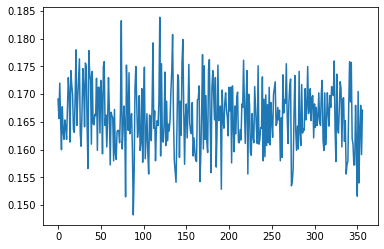

In [9]:
plot_frames(frames_RL, start = 1, end = None)

## **Entrez dans l'apprentissage par renforcement**

In [10]:
env = Student(qcms, low, high, n_choices = n_choices)
env.prepare_dataset(batch_size = batch_size) 

In [11]:
Q = get_Q()

In [12]:
Q, all_loss, all_reward = train(env, train_n_episodes, Q)

Episode: 1000, n_epochs : 3, reward 0.50625
Training finished.



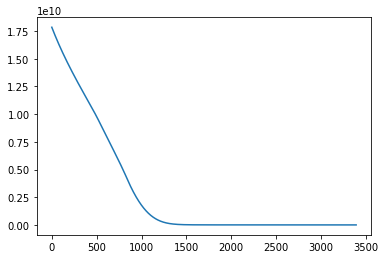

In [13]:
standard_plot(dic = all_loss, start = 1, end = None)

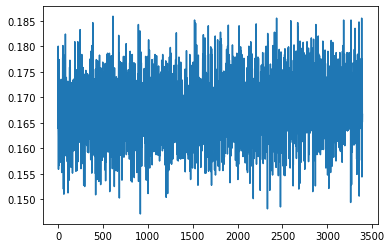

In [14]:
standard_plot(dic = all_reward, start = 1, end = None)

In [15]:
import torch
x = torch.Tensor([1, 70.0])
Q(x)

tensor([73.5046], grad_fn=<AddBackward0>)

In [16]:
frames_RL = evaluate(env, val_n_episodes, Q)

Episode: 100, n_epochs : 4, reward 0.661125
Results after 100 episodes:
Average timesteps per episode: 3.34


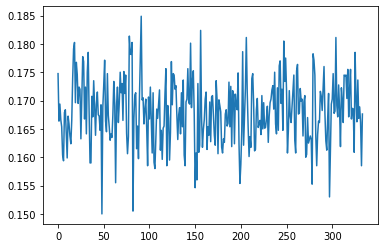

In [18]:
plot_frames(frames_RL, start = 1, end = None)